# European Option Pricing

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import warnings
from quantfin.models import options

warnings.filterwarnings('ignore')

## Assumptions

In [2]:
s0 = 1000  # initial asset price
k = 1020  # strike
r = 0.02  # discount rate
sigma = 0.05  # Wiener process assumptions
t = 30  # days to maturity
runs = 1000  # MC simulation

# Build European options
opt = options.EuropeanOption(s0, r, t)

## Price option via Monte-Carlo Simulation

In [3]:
%%time
# Price MC
call_mc = opt.price_mc(runs, r, sigma, k, call=True)
put_mc = opt.parity(k, call=call_mc)
print(f'\n==MC simulation== \ncall = {call_mc:.4f} \nput = {put_mc:.4f}')


==MC simulation== 
call = 0.7821 
put = 19.1068
Wall time: 29.9 ms


## Price call, put options using Black-Scholes model 

In [4]:
%%time
# Price Black-Scholes

call_bs, put_bs = opt.price_bs(sigma, k)
print(f'\n==BS model== \ncall = {call_bs:.4f} \nput = {put_bs:.4f}')


==BS model== 
call = 0.7065 
put = 19.0311
Wall time: 997 µs


## Estimate MC simulation discretization error

In [5]:
# Estimate discretization error
error = options.mean_abs_percentage_error(call_bs, call_mc)
print(f'\nMean absolute percentage error = {error:.2f}%')


Mean absolute percentage error = 9.68%


## Sensitivity analysis of price to strike and volatility


==Simulation results of option price[K]==
  K    | call_mc  | call_bs  |  put_mc  |  put_bs  | error, %
   900 | 101.3828 | 101.4782 |  -0.0954 |   0.0000 |   0.0940
   910 |  91.3052 |  91.4947 |  -0.1895 |   0.0000 |   0.2071
   920 |  81.0447 |  81.5111 |  -0.4664 |   0.0000 |   0.5722
   930 |  72.3309 |  71.5275 |   0.8034 |   0.0000 |   1.1232
   940 |  61.5112 |  61.5439 |  -0.0327 |   0.0000 |   0.0532
   950 |  50.6027 |  51.5607 |  -0.9576 |   0.0004 |   1.8580
   960 |  41.4139 |  41.5829 |  -0.1629 |   0.0061 |   0.4064
   970 |  31.7052 |  31.6548 |   0.1119 |   0.0616 |   0.1592
   980 |  22.2259 |  22.0029 |   0.6163 |   0.3933 |   1.0135
   990 |  13.3836 |  13.2919 |   1.7575 |   1.6658 |   0.6895
  1000 |   6.6890 |   6.5727 |   5.0465 |   4.9302 |   1.7698
  1010 |   2.3235 |   2.5099 |  10.6646 |  10.8510 |   1.7183
  1020 |   0.5926 |   0.7065 |  18.9173 |  19.0311 |   0.5983
  1030 |   0.1449 |   0.1419 |  28.4531 |  28.4502 |   0.0104
  1040 |   0.0122 |   0.020

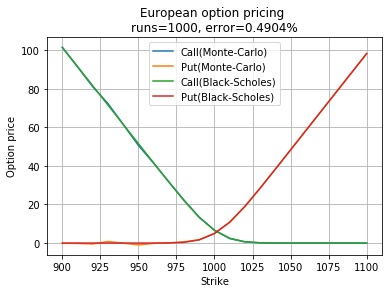


==Simulation results of option price[sigma]==
sigma  | call_mc  | call_bs  |  put_mc  |  put_bs  | error, %
     0 |   0.0000 |   0.0000 |  18.3247 |  18.3247 |   0.0000
  0.01 |   0.0000 |   0.0000 |  18.3247 |  18.3247 |   0.0000
  0.02 |   0.0000 |   0.0012 |  18.3247 |  18.3259 |   0.0066
  0.03 |   0.0572 |   0.0544 |  18.3819 |  18.3791 |   0.0154
  0.04 |   0.2732 |   0.2796 |  18.5979 |  18.6043 |   0.0345
  0.05 |   0.7645 |   0.7065 |  19.0891 |  19.0311 |   0.3048
  0.06 |   1.2929 |   1.2993 |  19.6176 |  19.6240 |   0.0325
  0.07 |   1.8484 |   2.0158 |  20.1730 |  20.3405 |   0.8231
  0.08 |   2.5386 |   2.8228 |  20.8632 |  21.1474 |   1.3438
  0.09 |   3.6114 |   3.6964 |  21.9361 |  22.0210 |   0.3858
   0.1 |   4.6898 |   4.6199 |  23.0144 |  22.9446 |   0.3043
Mean absolute percentage error = 0.4566%


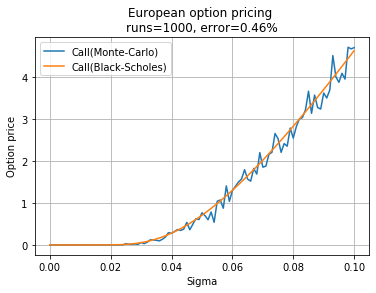

Wall time: 3.97 s


In [6]:
%%time
# Sensitivity analysis of price to strike and volatility
options.sensitivity_k(opt, r, sigma, runs=runs, plot=True)
options.sensitivity_sigma(opt, r, k, runs=runs, plot=True)

## Sensitivity analysis of discretization error to number of simulations


==Estimate error due to number of simulations==
 runs  | error, %
    10 |   3.7121
    20 |   0.3685
    30 |   2.8096
    40 |   1.0645
    50 |   1.7567
    60 |   2.4438
    70 |   2.9237
    80 |   2.1795
    90 |   0.8286
   100 |   2.0313
   110 |   1.8486
   120 |   0.2748
   130 |   1.7502
   140 |   0.6898
   150 |   1.6588
   160 |   2.0072
   170 |   1.8345
   180 |   0.3876
   190 |   0.2618
   200 |   0.4534
   210 |   0.3988
   220 |   0.4826
   230 |   1.5798
   240 |   0.1877
   250 |   0.4339
   260 |   0.9127
   270 |   0.0178
   280 |   0.3351
   290 |   0.6184
   300 |   0.0237
   310 |   0.5904
   320 |   0.5563
   330 |   0.2633
   340 |   0.0657
   350 |   0.2755
   360 |   0.2340
   370 |   1.1611
   380 |   0.0470
   390 |   0.2825
   400 |   0.4352
   410 |   1.4563
   420 |   0.7534
   430 |   1.2692
   440 |   0.9827
   450 |   0.1641
   460 |   0.1471
   470 |   1.1570
   480 |   0.0169
   490 |   0.5643
   500 |   0.0247
   510 |   0.7408
   520 |   0.70

No handles with labels found to put in legend.


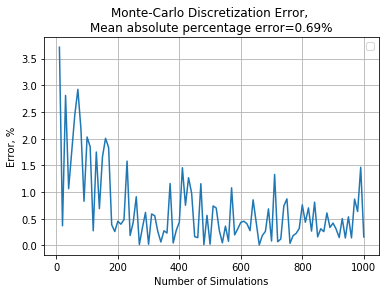

Wall time: 1.77 s


In [7]:
%%time
# Sensitivity of discretization error to number of simulations
options.simulation_error(opt, r, sigma, k, step=10, sim_limit=1000, plot=True)